mohammed majjaj week7  Page 89: 7-1

Exercises
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [1]:
# import dataset
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])


In [2]:
# import packages
%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot

In [3]:
mother_age = live.agepreg
birth_weight = live.totalwgt_lb

#### plotting scatter plot of birth weight versus mother’s age

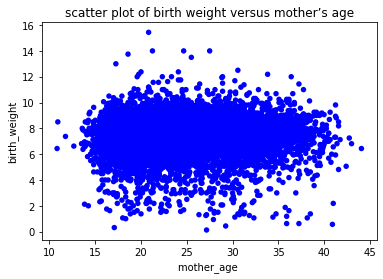

In [6]:
thinkplot.Scatter(mother_age , birth_weight, alpha=1)
thinkplot.Config(xlabel='mother_age ',
                 ylabel='birth_weight',
                 legend=False,
                title='scatter plot of birth weight versus mother’s age')

looks like there is no jitter tranformation needed.
i will need to adjust alpha and s for better transparency.


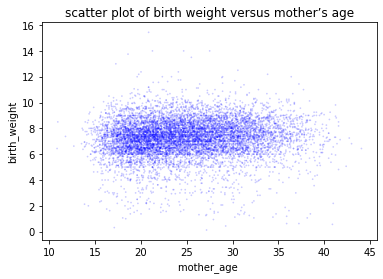

In [13]:
thinkplot.Scatter(mother_age , birth_weight, alpha=0.2, s=3)
thinkplot.Config(xlabel='mother_age ',
                 ylabel='birth_weight',
                 legend=False,
                title='scatter plot of birth weight versus mother’s age')

still can't make any assumption on the type of relationship between these two variable

#### Plot percentiles of birth weight versus mother’s age.



First I'll drop any rows that are missing mother_age  or birth_weight

In [25]:
cleaned = live.dropna(subset=['agepreg', 'totalwgt_lb'])

Then I'll divide the dataset into groups by mother_age.

In [28]:
bins = np.arange(15, 40, 2)
indices = np.digitize(cleaned.agepreg, bins)
groups = cleaned.groupby(indices)

Here are the number of respondents in each group:

In [29]:
for i, group in groups:
    print(i, len(group))

0 58
1 363
2 932
3 1188
4 1185
5 1146
6 1020
7 924
8 784
9 612
10 389
11 231
12 136
13 70


Now we can compute the CDF of birth_weight within each group.

In [30]:
mean_mother_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

And then extract the 25th, 50th, and 75th percentile from each group.

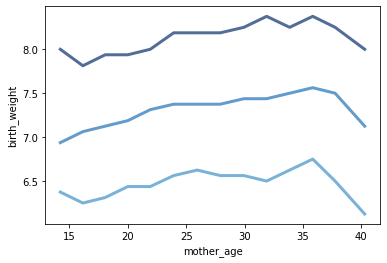

In [31]:
for percent in [75, 50, 25]:
    birth_weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_mother_age, birth_weight_percentiles, label=label)
    
thinkplot.Config(xlabel='mother_age',
                 ylabel='birth_weight',
                # axis=[140, 210, 20, 200],
                 legend=False)

we can see that there is a positive relationship between mother age and birthweight when mother age is between [17-37] outside of this range the relation ship is negative  
but over all it appears that the relationship between these two variable is weake. 

#### Compute Pearson’s and Spearman’s correlations.

In [35]:
# using numpy corr atribute.

cor = np.corrcoef(mother_age, birth_weight)
print(cor)

[[1.         0.06883397]
 [0.06883397 1.        ]]


In [42]:
# using the book functions

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [43]:
Corr(mother_age, birth_weight)

0.06883397035410907

both methods returned same Spearman’s correlations.  
0.068  which is very weak positive relationship between the two variables
